---
title: "Understanding and Improving Deep Convolutional Networks"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-08"
categories: [python, datacamp, machine learning, deep learning, tensorflow, keras, neural network]
image: "understandingCNN.png"

---

# Understanding and Improving Deep Convolutional Networks

The use of neural networks for training can be improved in a number of ways. We will discuss approaches to improving convolutional neural networks in this chapter as well as our ability to track how well a network is doing.

This **Understanding and Improving Deep Convolutional Networks** is part of [Datacamp course: Image Processing with Keras in Python] Deep learning methods are used in image processing to train neural network algorithms to perform various machine learning tasks. Using convolutional neural networks (CNNs), you will be able to classify different types of objects for the analysis of images. In this four-hour course, you will be taught how to construct, train, and evaluate CNNs using Keras.

It is a challenging task to turn images into data and train neural networks to classify them using deep learning. It has extensive applications in business and research ranging from helping eCommerce sites manage inventory more efficiently to assisting cancer researchers to identify dangerous melanoma quickly.

In the first chapter of this course, you will learn how images can be viewed as data and how you can use Keras to train a neural network to classify objects within an image.

A fundamental component of CNNs is convolutions, which will be discussed in the second chapter. Through the use of test data, you will learn how Keras CNNs operate on image data and how to train and tweak your Keras CNN. In later chapters, you will learn how to create a deep learning network in greater detail.

In this course, you will learn how to track the performance of a CNN and how to improve it. By this point, you will be able to create Keras neural networks, optimize them, and visualize their responses across a variety of applications.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Image Processing with Keras in Python]: (https://app.datacamp.com/learn/courses/image-processing-with-keras-in-python)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tracking learning
## Plot the learning curves
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(4, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Metal device set to: Apple M2 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 4)         20        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         296       
                                                                 
 flatten (Flatten)           (None, 968)               0         
                                                                 
 dense (Dense)               (None, 3)                 2907      
                                                                 
Total params: 3,223
Trainable params: 3,223
Non-trainable params: 0
____________________

Epoch 1/3


2023-04-09 00:07:31.542311: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 2s 50ms/step - loss: 7.5100 - accuracy: 0.3750 - val_loss: 4.3958 - val_accuracy: 0.3000
Epoch 2/3
4/4 [==============================] - 0s 19ms/step - loss: 2.4179 - accuracy: 0.5500 - val_loss: 3.0134 - val_accuracy: 0.6000
Epoch 3/3
4/4 [==============================] - 0s 18ms/step - loss: 1.4182 - accuracy: 0.8500 - val_loss: 1.8156 - val_accuracy: 0.7000


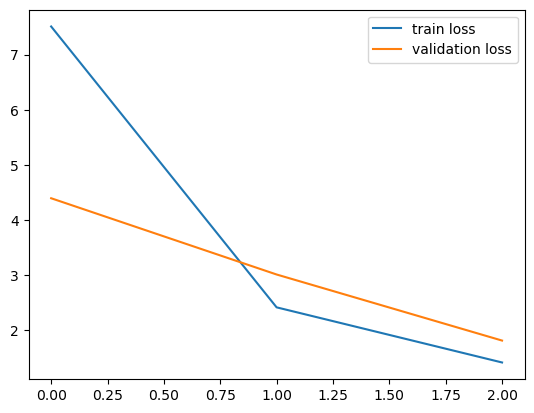

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

# Train the model and store the training object (including modelCheckpoint callback)
training = model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=0.2,
                     callbacks=[checkpoint])

# Extract the history from the training object
history = training.history

# Plot the training loss
plt.plot(history['loss'], label='train loss');
# Plot the validation loss
plt.plot(history['val_loss'], label='validation loss');
plt.legend();

## Using stored weights to predict in a test set
Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. test_data).

In [5]:
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
# model.predict_classes(test_data) <- .predict_classes API will be decrepted
print(np.argmax(model.predict(test_data), axis=-1))
print(test_labels)

1/1 [==============================] - 0s 47ms/step
[1 1 1 1 1 2 0 0 1 0]
[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


# Regularization
* Dropout
    * In each learning step:
        * Select a subset of the units
        * Ignore it in the forward pass
        * And in the back-propagation of error
![](understandingCNN.png)

* Batch Normalization
    * Rescale the outputs
* Disharmony between dropout and batch normalization
    * Dropout tends to slow down learning, making it more incremental
    * Batch Normalization tends to make learning go faster
    * Their effects together may in fact each other.

## Adding dropout to your network
Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:

* Convolution (15 units, kernel size 2, 'relu' activation)
* Dropout (20%)
* Convolution (5 units, kernel size 2, 'relu' activation)
* Flatten
* Dense (3 units, 'softmax' activation)

In [6]:
from tensorflow.keras.layers import Dropout

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 dropout (Dropout)           (None, 27, 27, 15)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten_1 (Flatten)         (None, 3380)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 10143     
                                                                 
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


## Add batch normalization to your network
Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

* Convolution (15 units, kernel size 2, 'relu' activation)
* Batch normalization
* Convolution (5 unites, kernel size 2, 'relu' activation)
* Flatten
* Dense (3 units, 'softmax' activation)


In [7]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 15)       60        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten_2 (Flatten)         (None, 3380)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 10143     
                                                                 
Total params: 10,583
Trainable params: 10,553
Non-trainable params: 30
_________________________________________________

# Interpreting the model
## Extracting a kernel from a trained network
One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.

In [8]:
model = Sequential()

model.add(Conv2D(5, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(15, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('weights_fasion.hdf5', monitor='val_loss', save_best_only=True)

model.fit(train_data, train_labels, epochs=3, validation_split=0.2, batch_size=10,
          callbacks=[checkpoint]);

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 5)         25        
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 15)        315       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 15)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2535)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 7608      
                                                                 
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
____________________________________________________

In [9]:
model.load_weights('weights_fasion.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][..., 0, 0]
print(kernel)
print(kernel.shape)

[[ 0.03288151 -0.00775972]
 [ 0.4874315   0.33240092]]
(2, 2)


## Visualizing kernel responses
One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. Given images in the test_data variable, a function called extract_kernel() that extracts a kernel from the provided network, and the function called convolution() that we defined in the first chapter, extract the kernel, load the data from a file and visualize it with matplotlib.

In [10]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

In [11]:
out = convolution(test_data[3, :, :, 0], kernel)

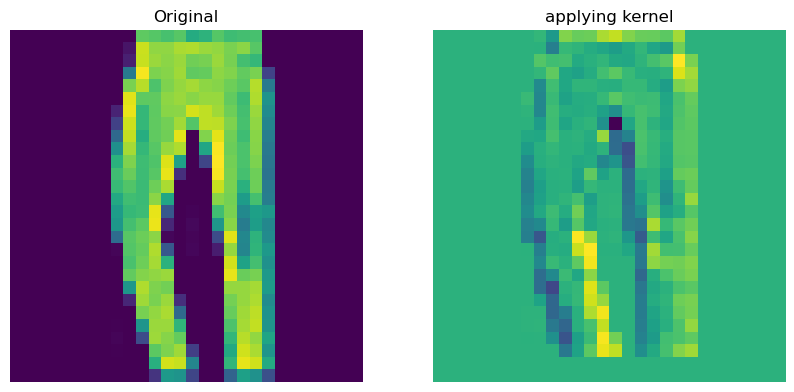

In [12]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

plot_comparison(test_data[3, :, :, 0], out, 'applying kernel')